# Task3-Car Price Predicton with Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [3]:
#Load and Inspect Dataset
df = pd.read_csv("car data.csv")
print(df.head())
print(df.info())
print(df.describe())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [4]:
# Data Preprocessing
# Drop Car_Name (too many unique values, not useful directly)
df = df.drop("Car_Name", axis=1)

# Encode categorical variables
le = LabelEncoder()
df["Fuel_Type"] = le.fit_transform(df["Fuel_Type"])      # Petrol/Diesel/CNG → 0/1/2
df["Selling_type"] = le.fit_transform(df["Selling_type"]) # Dealer/Individual → 0/1
df["Transmission"] = le.fit_transform(df["Transmission"]) # Manual/Automatic → 0/1

print(df.head())


   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0  2014           3.35           5.59       27000          2             0   
1  2013           4.75           9.54       43000          1             0   
2  2017           7.25           9.85        6900          2             0   
3  2011           2.85           4.15        5200          2             0   
4  2014           4.60           6.87       42450          1             0   

   Transmission  Owner  
0             1      0  
1             1      0  
2             1      0  
3             1      0  
4             1      0  


In [5]:
# Feature and Target Split
X = df.drop("Selling_Price", axis=1)  # Features
y = df["Selling_Price"]               # Target


In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [7]:
# Train Model(Random Forest Regressor)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
# Model Evaluation
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: 0.9630473458807466
Mean Absolute Error: 0.6171081967213115


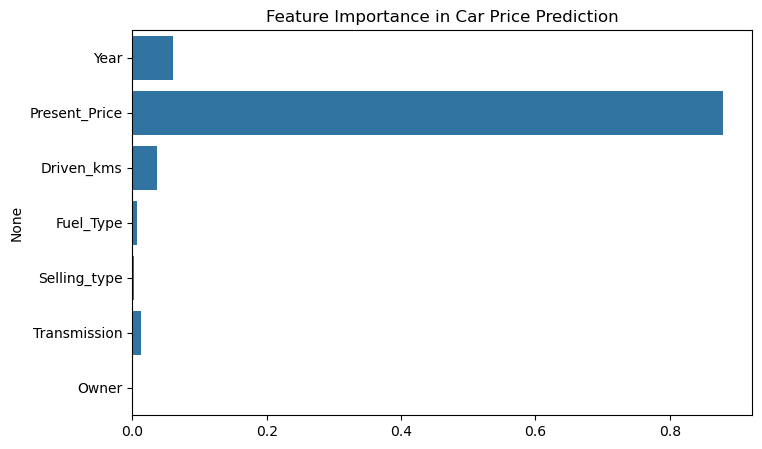

In [9]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Car Price Prediction")
plt.show()


In [10]:
# Predict New Car Price
sample_car = np.array([[2018, 8.5, 35000, 1, 0, 1, 0]])  
# [Year, Present_Price, Driven_kms, Fuel_Type, Selling_type, Transmission, Owner]

predicted_price = model.predict(sample_car)
print("Predicted Selling Price:", predicted_price[0], "Lakhs")


Predicted Selling Price: 6.5604999999999976 Lakhs


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
